In [54]:
from collections import Counter
from glob import glob 
from utils.cleaner import cleanTexts
import pickle
import pandas as pd
import seaborn as sns
from collections import Counter
from glob import glob 
path =  "data/dataset"
data = cleanTexts(path,lematizer = False,stopword=False,steaming = False,extractor=False)
file_pi = open('dataCleaned.obj', 'wb') 
pickle.dump(data, file_pi)

In [66]:
filehandler = open("dataCleaned.obj", 'rb') 
data = pickle.load(filehandler)
df = pd.DataFrame({},columns=["text","class"])
for i in range(len(data)):
        df = df.append(pd.DataFrame(data[i], columns=df.columns),ignore_index=True)

In [74]:
texts = df[df["class"]==3]["text"].to_numpy().flatten()
textClass = ""
for elem in texts:
    textClass+=elem
textClass = textClass.split(" ")

In [75]:
from collections import Counter


 # equals to list(set(words))
 #
dfFiltered = pd.DataFrame({},columns=["word","count"])
dfFiltered["word"] = list(Counter(textClass).keys())
dfFiltered["count"] = list(Counter(textClass).values())
dataFiltered = dfFiltered.sort_values(by="count",ascending=False).head(5)

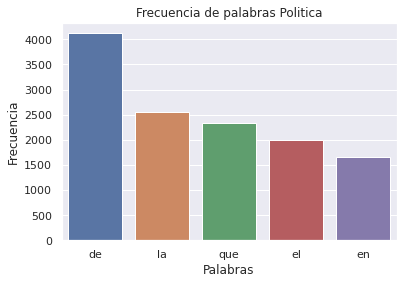

In [76]:
sns.set(font_scale=1) 
ax = sns.barplot(x="word", y="count", data=dataFiltered)
ax.set(xlabel='Palabras', ylabel='Frecuencia')
ax.set_title("Frecuencia de palabras Politica")
ax.figure.savefig('PalabrasConStopWordsPolitica.png',dpi=600)